# Healthcare Data Analysis: Patient Demographics and Vital Signs

Description:

    Analyzed a synthetic healthcare dataset consisting of patient demographics, vital signs, and medical conditions.

    Performed exploratory data analysis (EDA) to uncover trends, patterns, and correlations in healthcare data.

    Visualized key insights to support healthcare decision-making, such as identifying high-risk patient groups and vital sign distributions.

## Import libraries

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [55]:
# Load data
data = pd.read_csv(r"C:\Users\jades\Downloads\Healthcare analysis.csv")
data.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,31-01-2024 00:00,Matthew Smith,Sons Miller,Blue Cross,18856.28131,328,Urgent,02-02-2024 00:00,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,20-08-2019 00:00,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26-08-2019 00:00,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,22-09-2022 00:00,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07-10-2022 00:00,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,18-11-2020 00:00,Kevin Wells,Hernez Rogers Vang,Medicare,37909.78241,450,Elective,18-12-2020 00:00,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,19-09-2022 00:00,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09-10-2022 00:00,Penicillin,Abnormal
5,Emily Johnson,36,Male,A+,Asthma,20-12-2023 00:00,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.11095,389,Urgent,24-12-2023 00:00,Ibuprofen,Normal
6,Edward Edwards,21,Female,AB-,Diabetes,03-11-2020 00:00,Kelly Olson,Group Middleton,Medicare,19580.87234,389,Emergency,15-11-2020 00:00,Paracetamol,Inconclusive
7,Christina Martinez,20,Female,A+,Cancer,28-12-2021 00:00,Suzanne Thomas,"Powell Robinson Valdez,",Cigna,45820.46272,277,Emergency,07-01-2022 00:00,Paracetamol,Inconclusive
8,Jasmine Aguilar,82,Male,AB+,Asthma,01-07-2020 00:00,Daniel Ferguson,Sons Rich,Cigna,50119.22279,316,Elective,14-07-2020 00:00,Aspirin,Abnormal
9,Christopher Berg,58,Female,AB-,Cancer,23-05-2021 00:00,Heather Day,Padilla-Walker,UnitedHealthcare,19784.63106,249,Elective,22-06-2021 00:00,Paracetamol,Inconclusive


# # Check for missing values

In [5]:

print(data.isnull().sum())

# Drop duplicates (if any)
data.drop_duplicates(inplace=True)


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


## Descriptive statistics for numerical columns

In [47]:

print(data.describe())


                Age  Billing Amount   Room Number
count  54966.000000    54966.000000  54966.000000
mean      51.535185    25544.306284    301.124404
std       19.605661    14208.409711    115.223143
min       13.000000    -2008.492140    101.000000
25%       35.000000    13243.718641    202.000000
50%       52.000000    25542.749145    302.000000
75%       68.000000    37819.858159    401.000000
max       89.000000    52764.276736    500.000000


## Feature Engineering - Age Group

In [14]:
data['Age'].unique()


array([30, 62, 76, 28, 43, 36, 21, 20, 82, 58, 72, 38, 75, 68, 44, 46, 63,
       34, 67, 48, 59, 73, 51, 23, 78, 25, 33, 26, 70, 57, 74, 81, 49, 65,
       31, 22, 77, 42, 24, 84, 55, 40, 83, 18, 27, 19, 29, 61, 80, 60, 35,
       79, 53, 69, 47, 85, 52, 37, 50, 32, 54, 45, 66, 39, 56, 64, 71, 41,
       88, 17, 87, 86, 15, 16, 13, 14, 89], dtype=int64)

In [15]:
bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0–18', '19–35', '36–50', '51–65', '66–80', '81+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)


## Categorical Summary



    Look at the distribution of categorical columns like Gender, Blood Type, Medical Condition, etc.

Univariate Analysis (Single Variable Analysis)

Explore the distribution of each individual feature.

    Age Distribution:

        Plot a histogram to visualize the distribution of age.

# Exploratory Data Analysis (EDA)

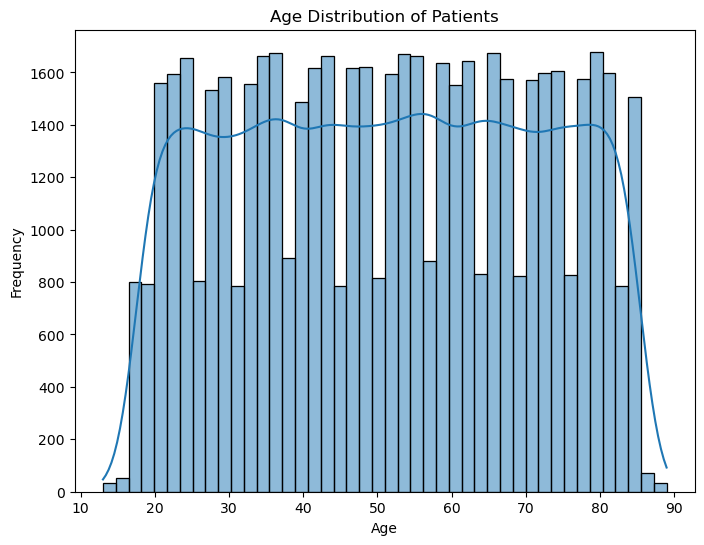

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Billing Amount Distribution:

    Visualize the distribution of Billing Amount. A boxplot can highlight outliers.

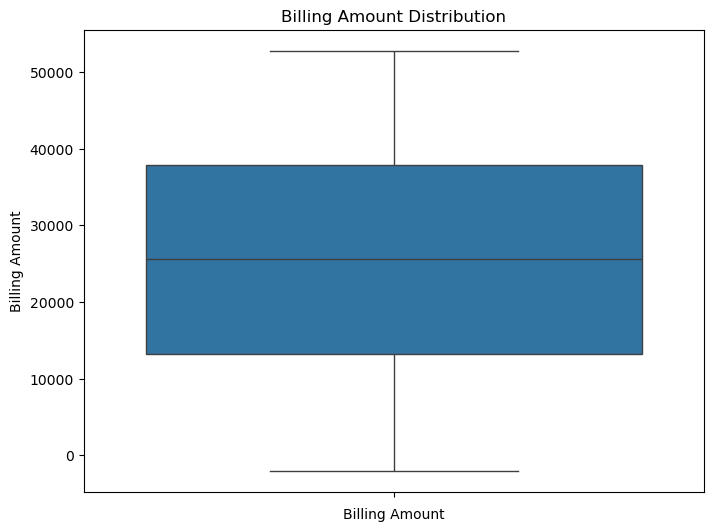

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['Billing Amount'])
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.show()


Medical Condition Distribution:

    Plot the frequency of various medical conditions.

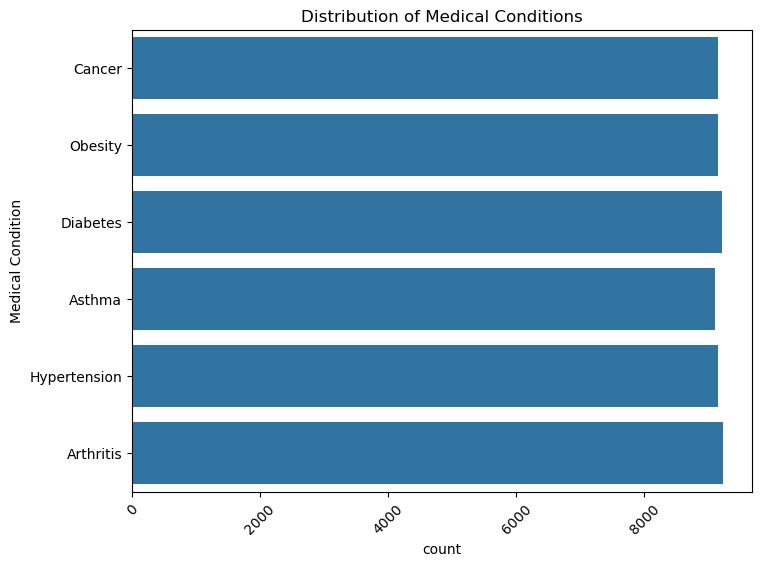

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data['Medical Condition'])
plt.title('Distribution of Medical Conditions')
plt.xticks(rotation=45)
plt.show()


Test Results Distribution:

    Show the distribution of Test Results (Normal, Inconclusive, Abnormal).

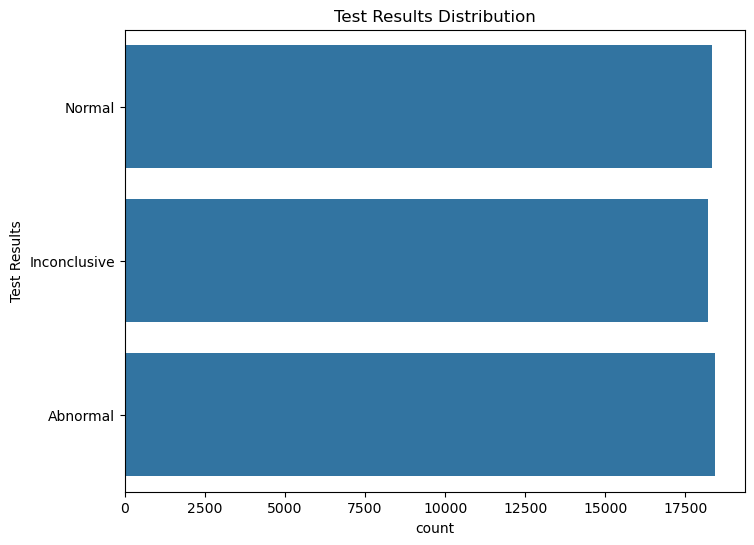

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data['Test Results'])
plt.title('Test Results Distribution')
plt.show()


 Bivariate Analysis (Exploring Relationships Between Two Variables)

Now, let's explore how two variables interact.

    Age vs Billing Amount:

        Explore the relationship between patient age and the billing amount with a scatter plot.

C:\Users\jades\AppData\Local\Temp\ipykernel_1328\701058007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Group', y='Billing Amount', data=data, palette='Set2')


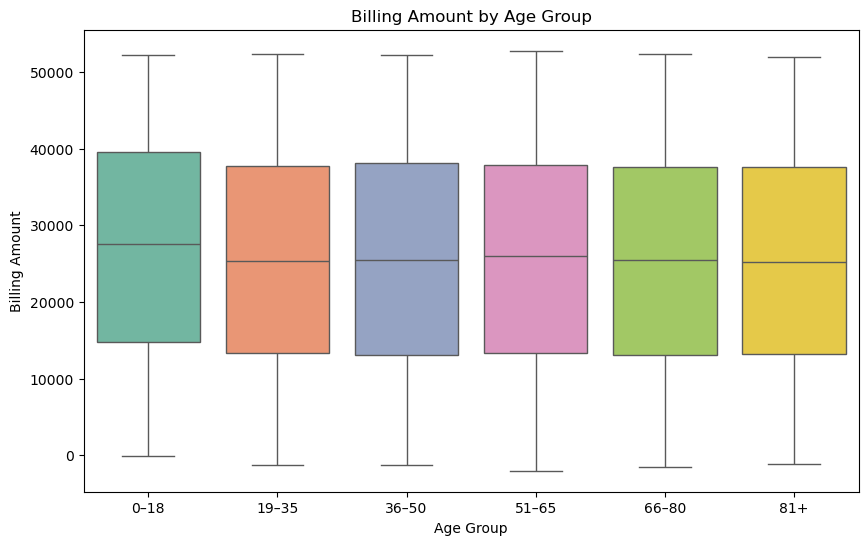

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Billing Amount', data=data, palette='Set2')
plt.title('Billing Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Billing Amount')
plt.show()



Medical Condition vs Billing Amount:

    Visualize the relationship between Medical Condition and Billing Amount using a box plot

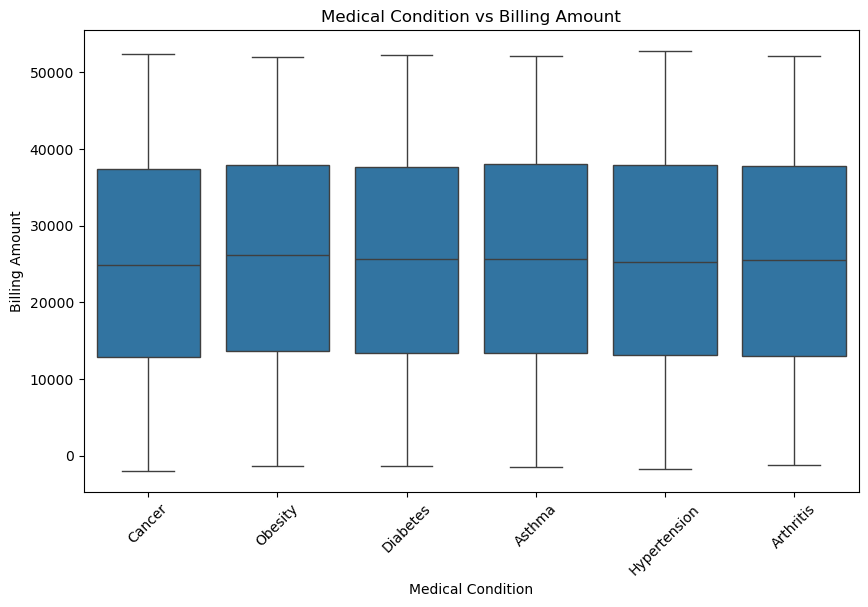

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=data)
plt.title('Medical Condition vs Billing Amount')
plt.xticks(rotation=45)
plt.show()


Admission Type vs Billing Amount:

    A box plot can also be used to compare the Billing Amount across different Admission Types (Urgent, Emergency, Elective).

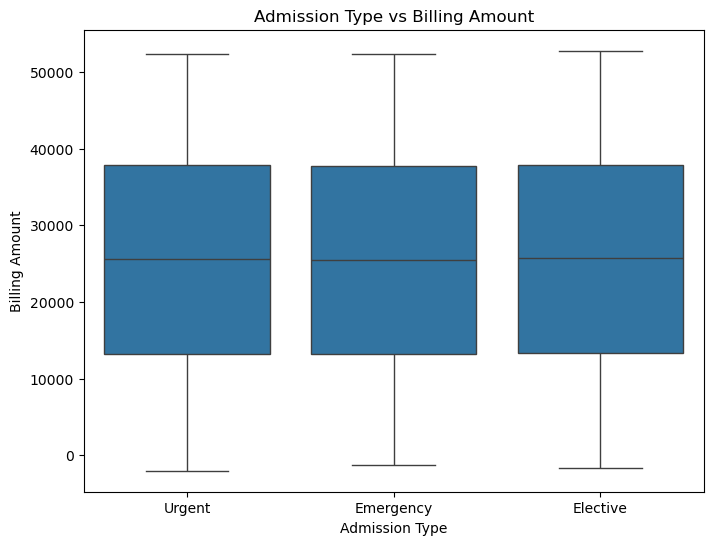

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=data)
plt.title('Admission Type vs Billing Amount')
plt.show()


Gender vs Test Results:

    Explore how Gender relates to Test Results using a stacked bar chart.

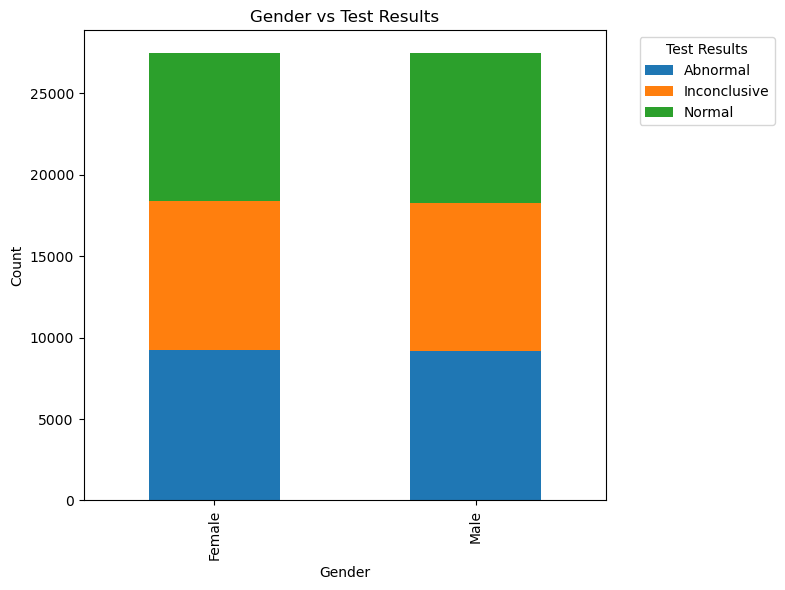

In [32]:
gender_test_results = pd.crosstab(data['Gender'], data['Test Results'])
ax = gender_test_results.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Gender vs Test Results')
plt.ylabel('Count')

# Move legend outside the plot
plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjusts plot to fit everything nicely
plt.show()



Multivariate Analysis (Exploring Relationships Between More Than Two Variables)

In multivariate analysis, we look at interactions between multiple variables.

    Medical Condition vs Test Results vs Billing Amount:

        A boxplot can give insights into how Medical Condition, Test Results, and Billing Amount interact.

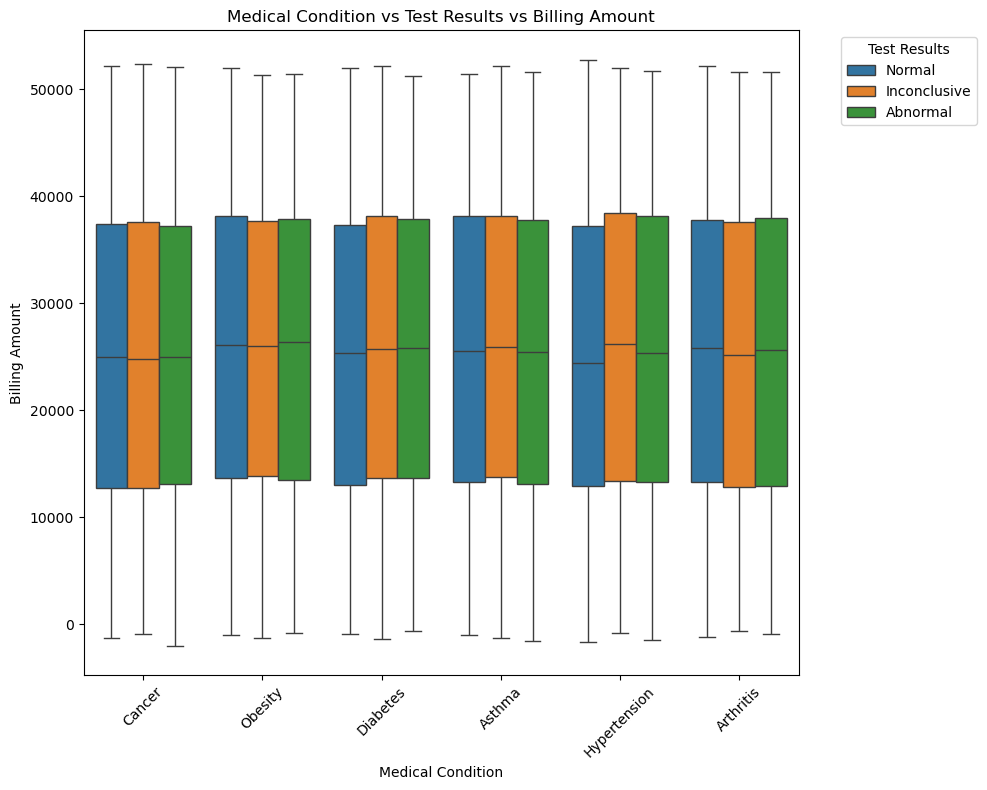

In [33]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=data, hue='Test Results')

plt.title('Medical Condition vs Test Results vs Billing Amount')
plt.xticks(rotation=45)

# Move the legend outside the plot
plt.legend(title='Test Results', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



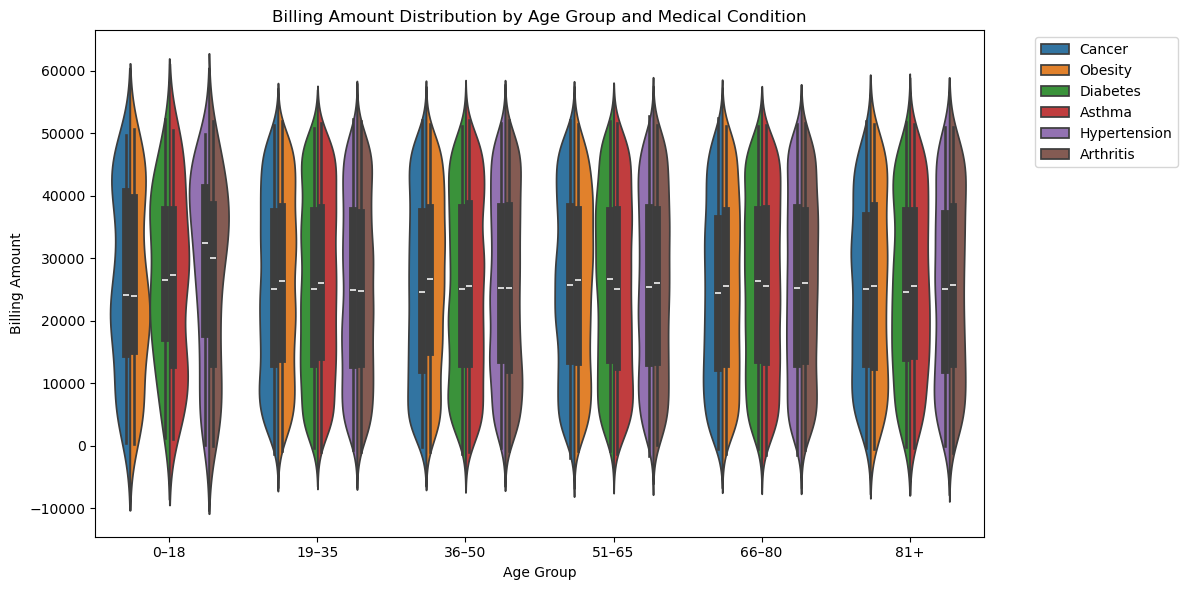

In [38]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Age Group', y='Billing Amount', hue='Medical Condition', data=data, split=True)
plt.title('Billing Amount Distribution by Age Group and Medical Condition')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
2. Boxplot of Billing Amount by Age Groups and Medical Condition 

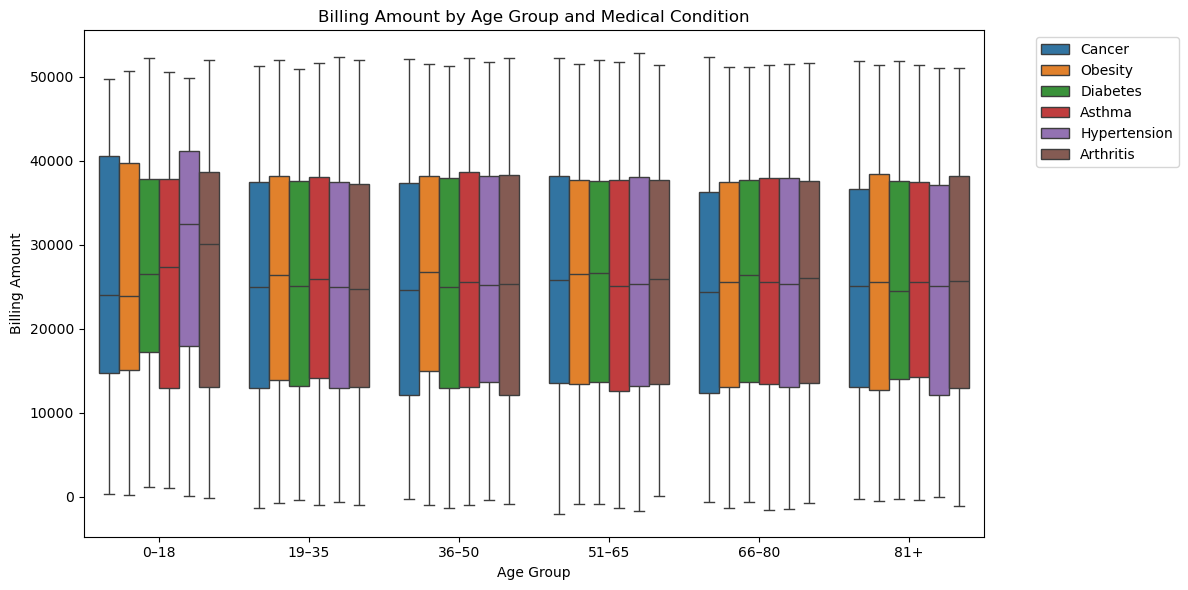

In [45]:


plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Billing Amount', hue='Medical Condition', data=data)
plt.title('Billing Amount by Age Group and Medical Condition')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Room Number vs Test Results:

    A heatmap or grouped bar chart can show how many Test Results were recorded in each room.

Room Number vs Test Results:

    A heatmap or grouped bar chart can show how many Test Results were recorded in each room.

In [40]:
subset = data[data['Room Number'].isin(data['Room Number'].unique()[:20])]
room_test_results = pd.crosstab(subset['Room Number'], subset['Test Results'])



In [41]:
room_counts = pd.crosstab(data['Room Number'], data['Test Results'])
top_rooms = room_counts.sum(axis=1).sort_values(ascending=False).head(20).index
filtered = data[data['Room Number'].isin(top_rooms)]
room_test_results = pd.crosstab(filtered['Room Number'], filtered['Test Results'])


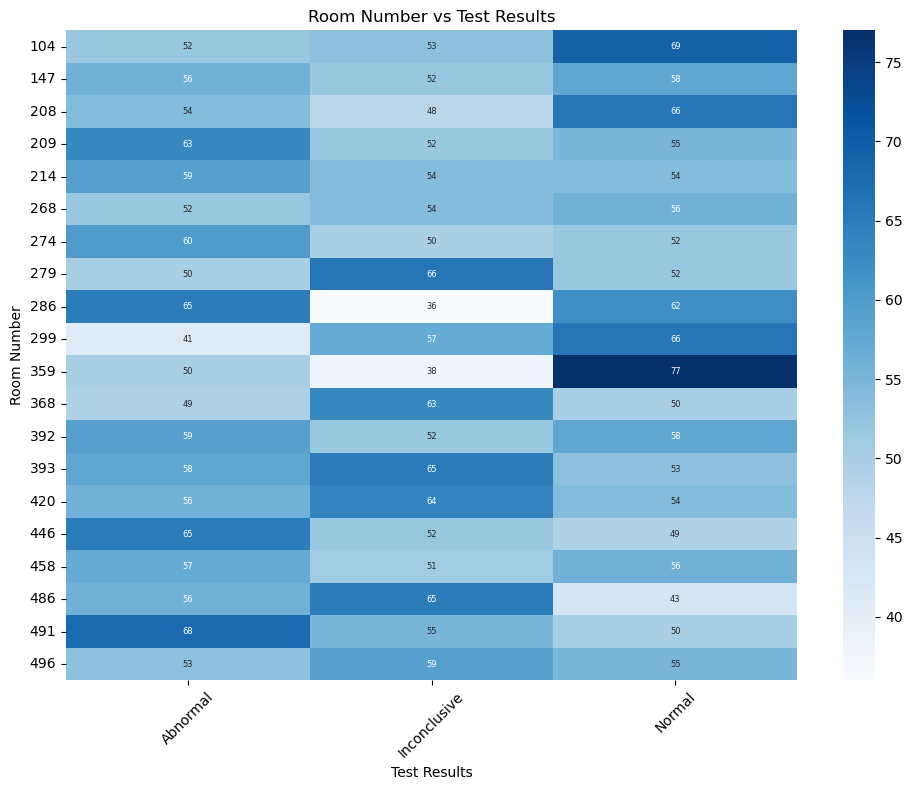

In [43]:
room_test_results = pd.crosstab(filtered['Room Number'], filtered['Test Results'])

plt.figure(figsize=(10, 8))
sns.heatmap(room_test_results, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 6})
plt.title('Room Number vs Test Results')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



 Outlier Detection

Identifying outliers is essential, especially in billing amounts.

    Identify Outliers in Billing Amount:

        Boxplots can help identify outliers in numerical variables like Billing Amount.

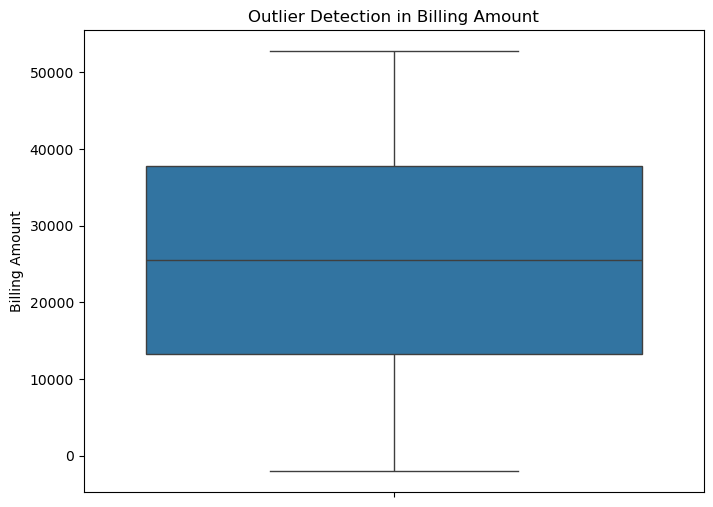

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['Billing Amount'])
plt.title('Outlier Detection in Billing Amount')
plt.show()


7. Correlation Analysis

Examine correlations between numerical features using a correlation matrix.

    Correlation Heatmap:

        Look at how numerical features (like Age, Billing Amount, Room Number) are correlated.

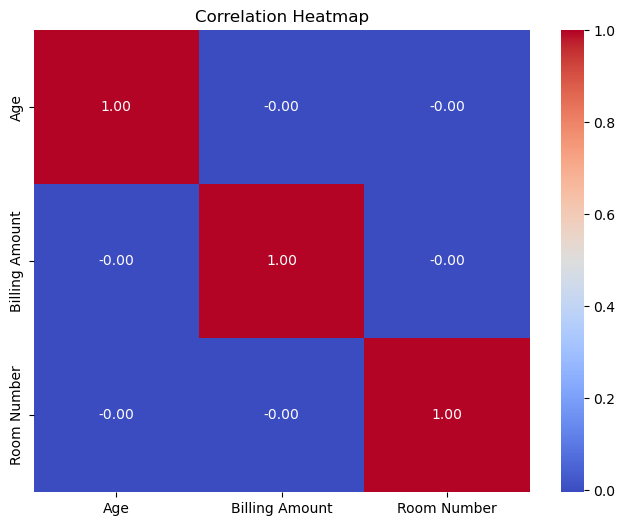

In [31]:
numeric_data = data[['Age', 'Billing Amount', 'Room Number']]  # Add more numerical columns if needed
corr = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
